# Simulate Thompson Sampling

Example Dataset: 

(1)ROC_AUC_SCORE: calculated between true labels and predictions for each iterations  
(2)Cumulative gain: for each iteration, if the maximum prediction corresponding with the valid labels gain 1, otherwise 0. Show cumulative gain for all iterations.

There are two settings for labelling:  
(a). repeated labelling: allow one instance to be labelled more than once   
(b). unrepeated labelling: otherwise

Two settings for recommendation:  
(I). Random Sampling (RS)  
(II). Thompson Sampling (TS)


I used [NATIONS](https://github.com/dongwookim-ml/kg-data) dataset as an example, there are totally 2,024 valid triples. For (b), it doesn't make sense if we sample more than 2,024 times. So I chose test 2,000 iterations for (b). And more iterations (5000) for repeated labelling.

Experiment 1: unrepeated labelling + 2000 iterations 

Experiment 2: repeated labelling + 5000 iterations


In [1]:
# direct to parent folder
import sys
sys.path.append("..")

from acton.database import LabelOnlyASCIIReader, LabelOnlyManagedHDF5Database
from acton.predictors import TensorPredictor
from acton.recommenders import ThompsonSamplingRecommender
from acton.labellers import LabelOnlyDatabaseLabeller
import acton.acton
import tempfile
import astropy.io.ascii as io_ascii
import os.path
import numpy
import logging
import matplotlib.pyplot as plt
import pickle

/home/admin-u6015325/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
logging.basicConfig(level = logging.DEBUG)

_path = '../tests/kg-data/nation/triples.txt'
output_path = '../acton/acton.proto'
n_dim = 10
TS= 0.0
RANDOM = 1.0

In [3]:
with LabelOnlyASCIIReader(_path, n_dim) as reader:
    n_relations = reader.n_relations
    n_entities = reader.n_entities
    totoal_size = n_relations * n_entities * n_entities
    ids = numpy.arange(totoal_size)
    
    # repeated labelling
    N_EPOCHS = 5
    repeated_labelling = True
    
    results = {}

    # TS 
    results['TS_repeated_train_error_list'], results['TS_repeated_test_error_list'],\
    results['TS_repeated_gain'] =  acton.acton.simulate_active_learning(ids, reader, {}, output_path, 
                                                                        n_epochs= N_EPOCHS,
                                                                        recommender='ThompsonSamplingRecommender',
                                                                        predictor= 'TensorPredictor',
                                                                        labeller= 'LabelOnlyDatabaseLabeller',
                                                                        diversity= TS, 
                                                                        repeated_labelling = repeated_labelling)
    # Random 
    results['RD_repeated_train_error_list'], results['RD_repeated_test_error_list'],\
    results['RD_repeated_gain'] =  acton.acton.simulate_active_learning(ids, reader, {}, output_path, 
                                                                        n_epochs= N_EPOCHS,
                                                                        recommender='ThompsonSamplingRecommender',
                                                                        predictor= 'TensorPredictor',
                                                                        labeller= 'LabelOnlyDatabaseLabeller',
                                                                        diversity= RANDOM,
                                                                        repeated_labelling = repeated_labelling)
    # unrepeated labelling
    N_EPOCHS = 2
    repeated_labelling = False
    
    # TS 
    results['TS_unrepeated_train_error_list'], results['TS_unrepeated_test_error_list'],\
    results['TS_unrepeated_gain'] = acton.acton.simulate_active_learning(ids, reader, {}, output_path, 
                                                                        n_epochs= N_EPOCHS,
                                                                        recommender='ThompsonSamplingRecommender',
                                                                        predictor= 'TensorPredictor',
                                                                        labeller= 'LabelOnlyDatabaseLabeller',
                                                                        diversity= TS, 
                                                                        repeated_labelling = repeated_labelling)
    # Random 
    results['RD_unrepeated_train_error_list'], results['RD_unrepeated_test_error_list'],\
    results['RD_unrepeated_gain'] = acton.acton.simulate_active_learning(ids, reader, {}, output_path, 
                                                                        n_epochs= N_EPOCHS,
                                                                        recommender='ThompsonSamplingRecommender',
                                                                        predictor= 'TensorPredictor',
                                                                        labeller= 'LabelOnlyDatabaseLabeller',
                                                                        diversity= RANDOM,
                                                                        repeated_labelling = repeated_labelling)

DEBUG:root:New feature E array size: (5, 14, 10)
DEBUG:root:New feature R array size: (5, 56, 10, 10)
DEBUG:root:New label array size: (56, 14, 14)
DEBUG:root:Found 10976 instances.
DEBUG:root:Splitting into training/testing sets.
DEBUG:root:Drawing initial labels.
DEBUG:root:Recommending: [(42, 11, 0), (22, 1, 10), (42, 3, 9), (46, 0, 3), (48, 8, 5), (43, 8, 7), (48, 0, 10), (11, 4, 0), (47, 9, 4), (28, 12, 5)]
DEBUG:root:Writing protobufs to ../acton/acton.proto.
INFO:root:Epoch 1/5
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8770).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 13, 7)]
INFO:root:Epoch 2/5
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predic

In [4]:
with open('outfile', 'wb') as fp:
    pickle.dump(results,fp)

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/admin-u6015325/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/admin-u6015325/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


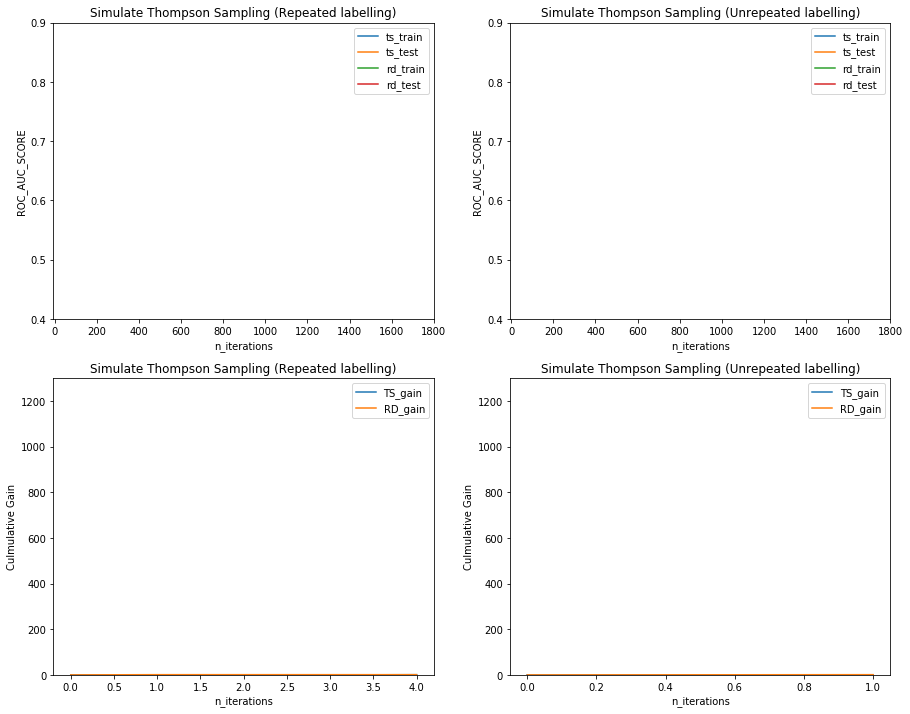

In [5]:
#with open ('outfile', 'rb') as fp:
#    results = pickle.load(fp)

plt.figure(figsize= (15,12))

# only plot 2000 iterations for the purpose of comparison with unrepeated labelling
plt.subplot(221)
plt.plot(results['TS_repeated_train_error_list'][:2000][::100], label = 'ts_train')
plt.plot(results['TS_repeated_test_error_list'][:2000][::100], label = 'ts_test')
plt.plot(results['RD_repeated_train_error_list'][:2000][::100], label = 'rd_train')
plt.plot(results['RD_repeated_test_error_list'][:2000][::100], label = 'rd_test')
plt.xticks(numpy.arange(20, step = 2), numpy.arange(2000)[::200])
plt.xlabel('n_iterations')
plt.ylabel('ROC_AUC_SCORE')
plt.ylim(0.4,0.9)
plt.title('Simulate Thompson Sampling (Repeated labelling)')
plt.legend()

plt.subplot(222)
plt.plot(results['TS_unrepeated_train_error_list'][::100], label = 'ts_train')
plt.plot(results['TS_unrepeated_test_error_list'][::100], label = 'ts_test')
plt.plot(results['RD_unrepeated_train_error_list'][::100], label = 'rd_train')
plt.plot(results['RD_unrepeated_test_error_list'][::100], label = 'rd_test')
plt.xticks(numpy.arange(20, step = 2), numpy.arange(2000)[::200])
plt.xlabel('n_iterations')
plt.ylabel('ROC_AUC_SCORE')
plt.ylim(0.4,0.9)
plt.title('Simulate Thompson Sampling (Unrepeated labelling)')
plt.legend()

plt.subplot(223)
plt.plot(numpy.cumsum(results['TS_repeated_gain'][:2000]), label = 'TS_gain')
plt.plot(numpy.cumsum(results['RD_repeated_gain'][:2000]), label = 'RD_gain')
plt.ylabel('Culmulative Gain')
plt.xlabel('n_iterations')
plt.ylim(0,1300)
plt.title('Simulate Thompson Sampling (Repeated labelling)')
plt.legend()

plt.subplot(224)
plt.plot(numpy.cumsum(results['TS_unrepeated_gain']), label = 'TS_gain')
plt.plot(numpy.cumsum(results['RD_unrepeated_gain']), label = 'RD_gain')
plt.ylabel('Culmulative Gain')
plt.xlabel('n_iterations')
plt.ylim(0,1300)
plt.title('Simulate Thompson Sampling (Unrepeated labelling)')
plt.legend()
plt.savefig('comparison.png')